## 1) List TEN things you learned during Weeks 1 and 2 and FIVE things you still don't understand or are curious and would like to learn about.

- ### *Things I have learned* 

1. Generating one random number sampled from the uniform distribution
2. Generating a nxm matrix contaning random numbers from the uniform distribution
3. How to make our work reproducible by using random seed.
4. Generating random integers in an interval using np.random.randint
5. Using seaborn library ( that I have never heard of it before) to making histograms
6. Generating random numbers from gaussian distribution.
7. The universality theorem for the uniform distribution to generate random numbers from other continous distribution
8. Plotting different lines 
9. Creating graphs in 3-dimensiol space 
10. How to define a class

- ### *Things that I am still struggling with*
1. I am still struggling with generating random numbers between a known interval( like 11 and 24). I am confused by the formula(shifting and scaling).
2. I do not understand that, in program G why did we add noise to the line instead of multiplying by it?
3. I am not sure when do we have to import libraries, is it like everytime we are writing a code? or just once in each work space?
4. I would like to know how do we put subtitle for 3D contour plots
5. I would like to learn how to round numbers in python.

# 2) What is the difference between the uniform distribution and the gaussian distribution?

Uniform distribution is the most common probability distribution and meaning all outcomes are equally likely to occur( and in the continous interval the probabilit of a single point is zero but we can get the probability of poitns around the numbers). 
But the gaussian distribution or The normal distribution is bell-shaped, which means value near the center of the distribution are more likely to occur as opposed to values on the tails of the distribution.

# 3) Let's plot the two dimensional bivariate Gaussian distribution
The general formula for the two dimensional [bivariate Gaussian distribution](https://en.wikipedia.org/wiki/Multivariate_normal_distribution) is:
$$g(x,y)=\frac{1}{\sqrt{(2\pi)^2\det\begin{pmatrix}\sigma_1^2&\rho\sigma_1\sigma_2\\\rho\sigma_1\sigma_2&\sigma_2^2\end{pmatrix}}}e^-\left\{{\frac{1}{2}\begin{pmatrix} x-\mu_1& y-\mu_2\end{pmatrix}\begin{pmatrix}\sigma_1^2&\rho\sigma_1\sigma_2\\\rho\sigma_1\sigma_2&\sigma_2^2\end{pmatrix}^{-1}\begin{pmatrix}x-\mu_1\\y-\mu_2\end{pmatrix}}\right\}$$

This can be compacted into 
$$g(x,y)=\frac{1}{\sqrt{(2\pi)^2\det(\Sigma)}}e^-\left\{{\frac{1}{2}(u-\mu)^T\Sigma^{-1}(u-\mu)}\right\}$$

Compare the above formula to the one dimensional Gaussian distribution function:
$$g(x)=\frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}$$

- When there is only one random variable you only have one mean $\mu$ and one standard deviation $\sigma$.

- When there are two random variables, you have two means $\begin{pmatrix}\mu_1\\\mu_2\end{pmatrix}$, two standard deviations $\begin{pmatrix}\sigma_1\\\sigma_2\end{pmatrix}$, and the product $\sigma^2$ will be replaced by the covariance matrix $\Sigma=\begin{pmatrix}\sigma_1^2&\rho\sigma_1\sigma_2\\\rho\sigma_1\sigma_2&\sigma_2^2\end{pmatrix}$ and its determinant. Here, $\rho$ is the correlation between the two random variables.

The following code plots the bivariate normal distribution. Read the code carefully then explain it step by step in the follwing cell.

C:\Users\zahra\AppData\Local\Temp\ipykernel_25012\3896253529.py:39: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  picture = fig.gca(projection='3d')


Text(0.5, 0.92, 'Bivariate Gaussian distribution')

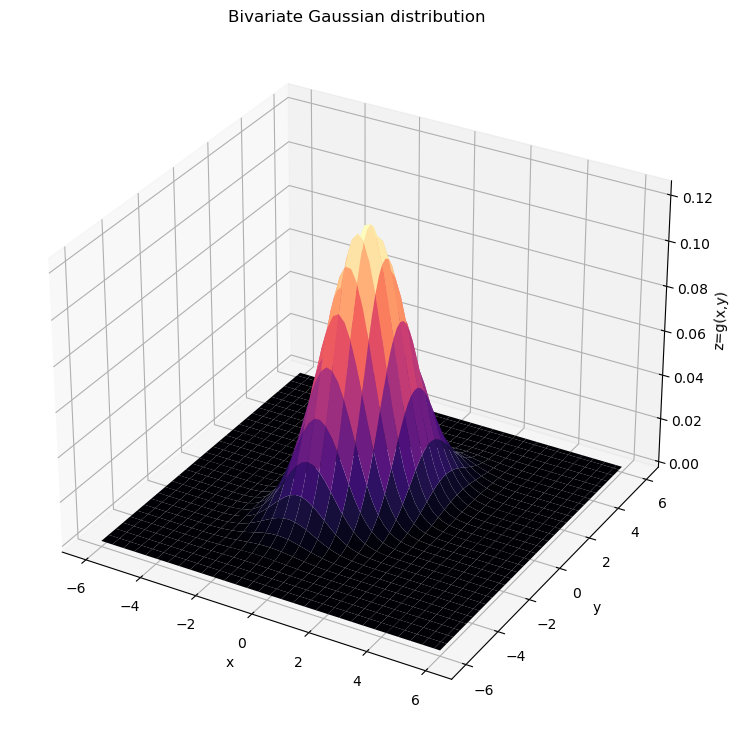

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits import mplot3d

# Our 2-dimensional distribution will be over variables X and Y
n = 60 # number of grid points on each axis
X = np.linspace(-6, 6, n)
Y = np.linspace(-6, 6, n)
X, Y = np.meshgrid(X, Y)
# Stack X and Y into a single 3-dimensional array
position = np.empty(X.shape + (2,)) #this gives a tensor of shape (60,60,2)
position[:, :, 0] = X
position[:, :, 1] = Y

# Mean vector and covariance matrix
mu_1=0
mu_2=0
mu = np.array([mu_1, mu_2])
Sigma = np.array([[ 1 , 3/5], [3/5,  2]])

def multivariate_gaussian(position, mu, Sigma):
    """This function returns the bivariate Gaussian distribution on array pos.
       pos is an array constructed by packing the meshed arrays of variables x and y into its last dimension.
    """
    Sigma_det = np.linalg.det(Sigma)
    Sigma_inv = np.linalg.inv(Sigma)
    N = np.sqrt((2*np.pi)**2 * Sigma_det) # this is the normalizing constant.
    fac = np.einsum('...k,kl,...l->...', position-mu, Sigma_inv, position-mu) # This einsum or Einstein sum calculates (u-mu)^T.Sigma^-1.(u-mu) in a vectorized
    # way across all the input variables.

    return np.exp(-fac / 2) / N

# The distribution on the variables X, Y stacked into position tensor.
Z = multivariate_gaussian(position, mu, Sigma)

# Create a surface plot
fig = plt.figure(figsize=(9,9))
picture = fig.gca(projection='3d')
picture.plot_surface(X, Y, Z, cmap=cm.magma) 
# set labels for axes
picture.set_xlabel('x')
picture.set_ylabel('y')
picture.set_zlabel('z=g(x,y)')
# set image title
picture.set_title('Bivariate Gaussian distribution')     

# Explain the above code line by line.

1. First we import our libraries numpy as np and matplotlib.pyplot as plt in order to write down our math formulas and graphing our plot and then we can import any functions that are in those libraries. For example we have imported cm from our matplotlib and we imported mplot3d from mpl_toolkits to get this 3D graph that we can see above. 

2. Then we define our variables.
- n is the number of grid points that we want to have in our x and y axes between the range of x and y  which in this problem we wanted 60 points within the range of -6 and 6.
- Then we define x and y using the function linspace that allow python to divivde this range (-6,6) into 60 sub intervals.  
- Then we create the two dimensiol grid using np.meshgrid(X, Y) which basically stores those point in two matrices.
3. Next, we define an empty object, called it position which gives a tensor of shape (60,60,2).Then we wanted to stack X and Y into a single 3-dimensional array. Note that the we gave indecies to our x and y and index in python stats from zero.

4. Then we want to define mean vector and covariance matrix. Since it is bivariate distribution we need two means so we define$\mu_{1}$ and $\mu_{2}$ and put them equal to zero since it is the guassian distribution. Then we use np.array in order to get our mean matrix. Next we define our covariance matrix and call it sigma andwe use np.array to get our 2x2 covariance matrix.

5. Then we define multivariate_gaussian function with parameters position, mu, Sigma.This function returns the bivariate Gaussian distribution on array pos.pos is an array constructed by packing the meshed arrays of variables x and y into its last dimension.
- Then we need to df=efine Sigma_det by np.linalg.det(Sigma) which basically gets the determinant of the covariance matrixand Sigma_inv by np.linalg.inv(Sigma).
- Then we define our normaling factor N which is that constant in our bivariate formula.
- Then we use einsum or Einstein sum calculates (u-mu)^T.Sigma^-1.(u-mu) in a vectorized way across all the input variables.
6. After wring our function, and defining all the variables we need to return it.

7. Next we define Z by multivariate_gaussian with parameters position, mu, Sigma. And we know that,the distribution on the variables X, Y stacked into position tensor. 

8. Then we create a figure object 'fig = plt.figure(figsize=(9,9))' and we defined the size inside the paranthesis of the object that we created.
- Next we tell python that inside this figure object that we created we wanted the three dimensional axes so we say 'picture = fig.gca(projection='3d')'. 
- Then we want to put all our x,y,x axes together in order to get our surface in the 3-dimensional space.
9. In this step like always we want our axes look nicer so we can set labels to each axes using picture.set_xlabel('x'), picture.set_ylabel('y') and for the thirs axes picture.set_zlabel('z=g(x,y)').

10. The last step is to put a title for this image where we used the picture.set_title function.



# 4) Now let's sample n points $(x_i,y_i)$ from the bivariate Gaussian distribution and use seaborn library to plot the sampled points in the x-y plane. These should look like the shadow in the $x$-$y$ plane of the surface plot of $g(x,y)$ above.
Read the following code then explain it line by line in the next cell.

Text(0.5, 1.0, 'Scatterplot for 6000 points sampled from the gaussian bivariate distribution')

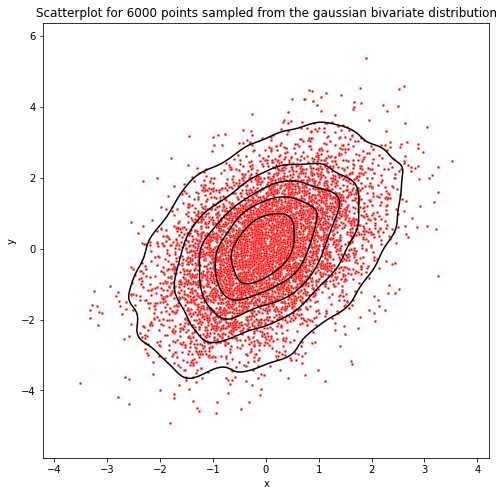

In [2]:
import seaborn as sns

# Simulate data from a bivariate Gaussian
n = 6000
mean = [0, 0]
cov = [(1, 3/5), (3/5, 2)]
x, y = np.random.multivariate_normal(mean, cov, n).T

# Draw a scatterplot with density contours
fig = plt.figure(figsize=(8,8))
sns.scatterplot(x=x, y=y, s=7, color="r")
sns.kdeplot(x=x, y=y, levels=6, color="k", linewidths=1.5)
# set labels for axes
plt.xlabel('x')
plt.ylabel('y')
# set image title
plt.title('Scatterplot for {} points sampled from the gaussian bivariate distribution'.format(n))

# Explain the above code line by line.

1. First we import seaborn library to draw a scatterplot with density contours.

2. Then we need to simulate data from a bivariate Gaussian by defining n as our sample point, so we choose 6000 sample points.

3. Then we define the mean since it is normal and bivariate we need a matrix with entires 0,0.

4. Then we define the covariane matrix which 2 by 2 the first entry is $\sigma_{11}$, the second is $\sigma_{12}$, and so in the second paranthesis we have $\sigma_{21}$ and $\sigma_{22}$ respectively. Note in the covariance matrix $\sigma_{12}$ is equal to 
$\sigma_{21}$.

5. Then we put together our x,y and define it by random multivariate normal function with parameters mean, covariance and n which we have already defined, in order to generate random x and y from a multivariate normal distribution. Note that since this is a normal distribution the probabilt of the point near the center is more likely to occur as opposed to values on the tails of the distribution.

6. Then we create a figure object 'fig = plt.figure(figsize=(8,8))' and we defined the size inside the paranthesis of the object that we created.

7. Then we draw our scatter plot using sns.scatterplot with parametrs x and yand we can design it with any colors we put red in here.

8. Then we can also add lines in order to see the contour and its pattern using sns.kdeplot, they are basically some level sets or the realization of the process of generating random numbers and they are more like emprical observations. we can again design it with anything we want any size or color.

9. Next step is to set labels for our x and y axes using plt.xlabel and plt.ylabel.

10. And the final step is to put a title for our contour which looks like a shaddow. 

# 5) Create a class for a car dealership called cars

1. The instances belonging to the class should have 5 attributes: make, model, year, color, and VIN number. 
2. Then specify 10 instances belonging to this class, and call certain attributes for three of these instances. 
3. Convert these instances into a dictionary then a data frame using one line of code. 
4. Create a histogram for each attribute. 

Toyota
White
9U5BMHB68B3286009


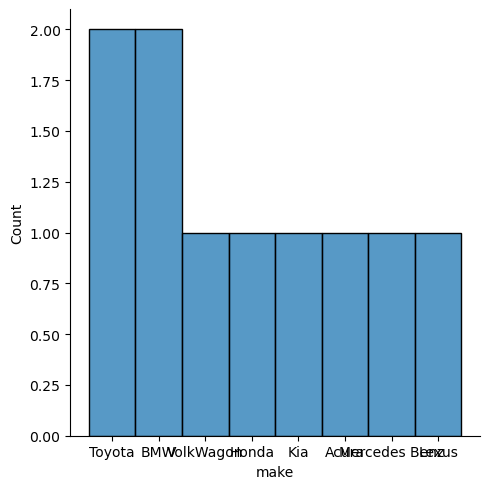

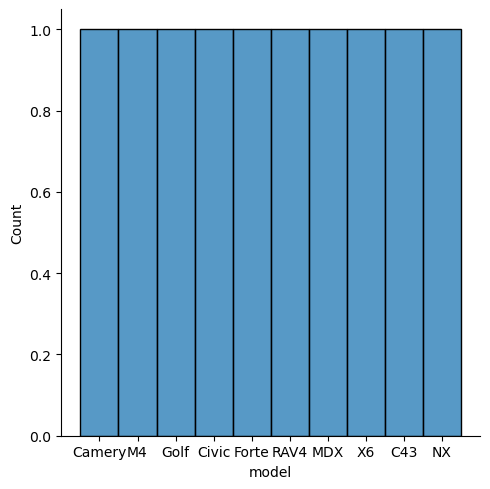

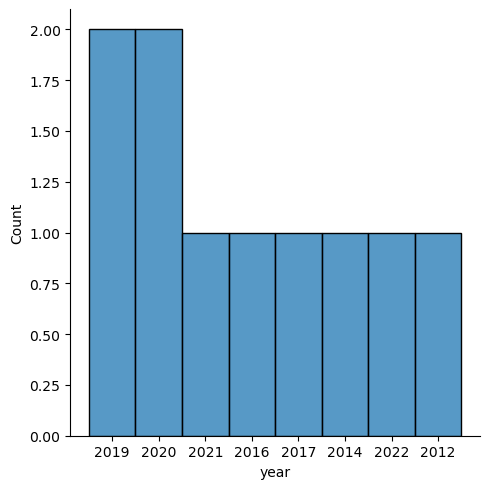

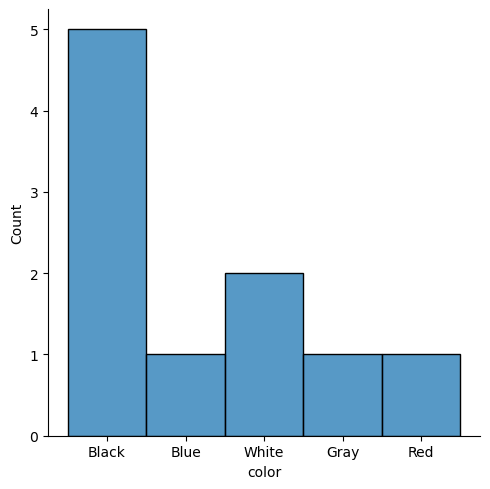

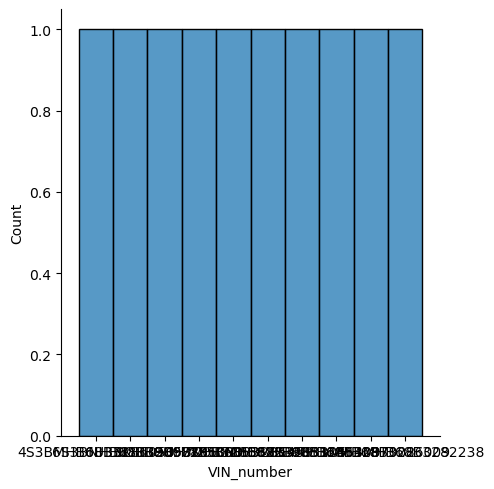

In [24]:
# YOUR CODE HERE

import matplotlib.pyplot as plt
import seaborn
import pandas

#Define the class

class cars:
    def __init__(instance,make,model,year,color,VIN_number):
        instance.make=make
        instance.model=model
        instance.year=year
        instance.color=color
        instance.VIN_number=VIN_number

# now define instances in the cars class
car_1=cars('Toyota','Camery','2019','Black','4S3BMHB68B3286050')
car_2=cars('BMW','M4', '2020','Blue','6S3BNHB68B3289878')
car_3=cars('VolkWagon','Golf','2021','White','6U3BMHB9007896090')
car_4=cars('Honda', 'Civic', '2016','Gray','9O3BOUH700B3286832')
car_5=cars('Kia', 'Forte','2017','Black','8H5BMHB68B3286459')
car_6=cars('Toyota', 'RAV4','2019','Black','1Z5BMHB68B3283105')
car_7=cars('Acura', 'MDX','2014','Red','7G5BMHB68B3286409')
car_8=cars('BMW', 'X6','2022','Black','8ZSBMHB68B3287002')
car_9=cars('Mercedes Benz', 'C43','2020','White','9U5BMHB68B3286009')
car_10=cars('Lexus', 'NX','2012','Black','6A5BMHB68B3282238')

# now check that your instances are saved the way they are supposed to
print(car_1.make)
print(car_3.color)
print(car_9.VIN_number)

#3 a data fram of Dictionary

data=[car_1.__dict__, car_2.__dict__, car_3.__dict__, car_4.__dict__, car_5.__dict__, car_6.__dict__, car_7.__dict__, car_8.__dict__, car_9.__dict__, car_10.__dict__,]
df=pandas.DataFrame.from_records(data)

#or we could do 
#s1=car_1.__dict__
#s2=car_2.__dict__
#s3=car_3.__dict__
#s4=car_4.__dict__
#s5=car_5.__dict__
#s6=car_6.__dict__
#s7=car_7.__dict__
#s8=car_8.__dict__
#s9=car_9.__dict__
#s10=car_10.__dict__

#and then making data frames using all si
#data=[s1,s2,s3,s4,s5,s6,s7,s8,s9,s10]
# but I am not sure by one line you meant first one or the second way I did both just in case

#4- making histograms
seaborn.displot(df.iloc[:,0]) # make histogram
seaborn.displot(df.iloc[:,1]) # model histogram
seaborn.displot(df.iloc[:,2]) # year histogram
seaborn.displot(df.iloc[:,3]) # color histogram
seaborn.displot(df.iloc[:,4]) # VIN number histogram





# 6) Consider the following image of car data
![image](carData.png)

1. Write a class that defines a blueprint for the data in this table and the associated attributes.
2. Enter all the instances pictured in the table.
3. Convert the instances into dictionaries then create the data frame similar to the above table.
4. Plot a histogram showing the distribution of the gas tank capacity of the cars.
5. Convert the categorical data in the Type column to numerical data reflecting its order.

              Model Country     Type  Weight  Turning_circle  Displacement  \
0     Acura Integra   Japan    Small    2700              37           112   
1   Acura Legend V6   Japan   Medium    3265              42           163   
2          Audi 100   Other   Medium    2935              39           141   
3           Audi 80   Other  Compact    2670              35           121   
4           Audi 90   Other  Compact    2790              35           141   
5          BMW 325i   Other  Compact    2895              35           152   
6          BMW 535i   Other   Medium    3640              39           209   
7     Buick Century     USA   Medium    2880              41           151   
8  Buick Electra V6     USA    Large    3350              43           231   

   Horsepower  Gas_Tank_Size  
0         130           13.2  
1         160           18.0  
2         130           21.1  
3         108           15.9  
4         130           15.9  
5         168           16.4  
6 

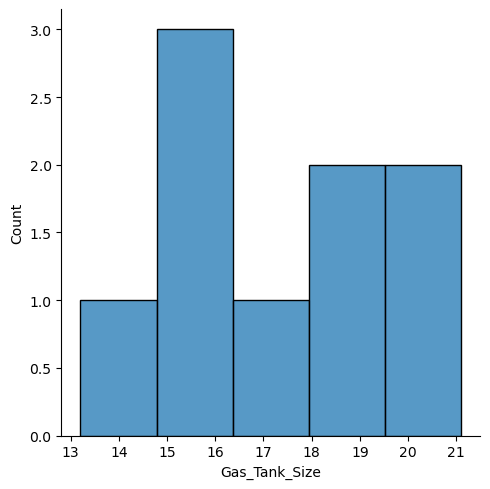

In [30]:
# YOUR CODE HERE

class cars_info:
    def __init__(instance,Model,Country,Type,Weight,Turning_circle,Displacement, Horsepower, Gas_Tank_Size):
        instance.Model=Model
        instance.Country=Country
        instance.Type=Type
        instance.Weight=Weight
        instance.Turning_circle=Turning_circle
        instance.Displacement=Displacement
        instance.Horsepower=Horsepower
        instance.Gas_Tank_Size=Gas_Tank_Size
        
# let's define partcipants as instances in our new class
c1=cars_info('Acura Integra','Japan', 'Small', 2700, 37, 112, 130, 13.2)
c2=cars_info('Acura Legend V6','Japan', 'Medium', 3265, 42, 163, 160, 18)
c3=cars_info('Audi 100','Other', 'Medium', 2935, 39, 141, 130, 21.1)
c4=cars_info('Audi 80','Other', 'Compact', 2670, 35, 121, 108, 15.9)
c5=cars_info('Audi 90','Other', 'Compact', 2790, 35, 141, 130, 15.9)
c6=cars_info('BMW 325i','Other', 'Compact', 2895, 35, 152, 168, 16.4)
c7=cars_info('BMW 535i','Other', 'Medium', 3640, 39, 209, 208, 21.1)
c8=cars_info('Buick Century','USA', 'Medium', 2880, 41, 151, 110, 15.7)
c9=cars_info('Buick Electra V6','USA', 'Large', 3350, 43, 231, 165, 18)


# let's put all my instances in a list (so I can convert them to dictionaries all at once)
c=[c1,c2,c3,c4,c5,c6,c7,c8,c9]

# Now let's put them in a data frame all at once
df=pandas.DataFrame([i.__dict__ for i in c])
print(df)


# Let's visualize using seaborn
seaborn.displot(df.loc[:,'Gas_Tank_Size']) # gas tank histogram

#converting categorical in type to numerical reflecting its order

numerical={'Type':{'Small':1, 'Compact':2,'Medium': 3, 'Large': 4}}
num_df = df.replace(numerical)
print(num_df)


# 7) Make a three dimensional contour or surface plot for the function

$$f(x,y)=3(1-x)^2e^{-x^2-(y+1)^2}-10\left(\frac{x}{5}-x^3-y^5\right)e^{-x^2-y^2}-\frac{1}{3}e^{-(x+1)^2 - y^2}$$

Text(0.5, 0.92, '3-dimensional contour plot')

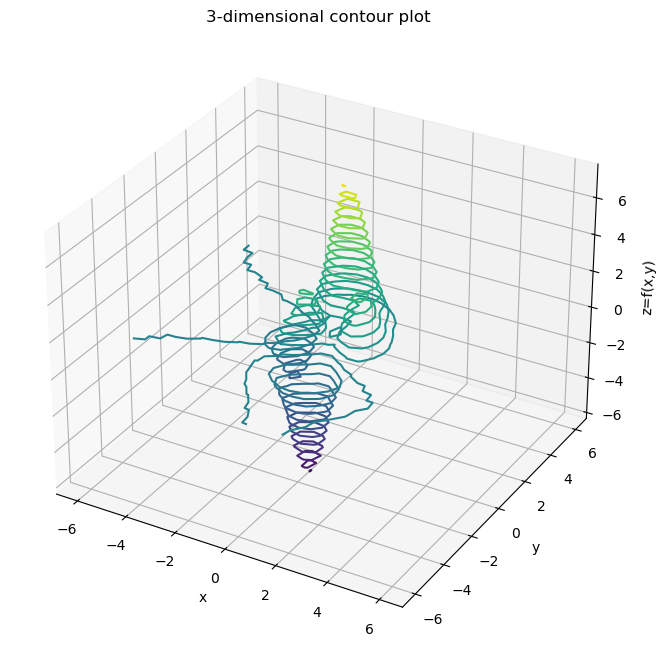

In [11]:
# YOUR CODE HERE
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits import mplot3d


def f(x,y):
    return (3*(1-x)**2*np.exp(-x**2-(y+1)**2)-10*(x/5-x**3-y**5)*np.exp(-x**2-y**2)-1/3*np.exp(-(x+1)**2-y**2))
# create the x and y grid points using numpy.linspace
x=np.linspace(-6,6,30)
y=np.linspace(-6,6,30)
# create the two dimensional grid
X,Y=np.meshgrid(x,y)
# Z=f(each point in the mesh grid)
Z=f(X,Y)

# Now plot Z 
picture=plt.figure(figsize=(8,8))
picture=plt.axes(projection='3d')
picture.contour3D(X,Y,Z,30) #you can specify the color map using the argument cmap=
# set labels for axes
picture.set_xlabel('x')
picture.set_ylabel('y')
picture.set_zlabel('z=f(x,y)')
# set image title
picture.set_title('3-dimensional contour plot')